In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


timestep = 1

save_dir = f'../data/newaction_{timestep}h_old'
full_data_file = os.path.join(save_dir, f'sepsis_final_data_withTimes_newActions.csv')
full_zs = pd.read_csv(full_data_file)

In [38]:
full_zs

,traj,step,m:presumed_onset,m:charttime,m:icustayid,o:gender,o:mechvent,o:re_admission,o:age,o:Weight_kg,...,o:output_4hourly,r:reward,o:max_dose_vaso,o:input_4hourly,a:iv_OLD,a:vaso_OLD,a:vaso,a:iv,a:action_OLD,a:action
0,1,0,7.245590e+09,7.245486e+09,200003.0,-0.5,-0.5,-0.5,-0.967320,-0.179834,...,0.614054,0.0,0.0,90.0,2,0,0,1,10,5
1,1,1,7.245590e+09,7.245515e+09,200003.0,-0.5,-0.5,-0.5,-0.967320,-0.161734,...,0.505675,0.0,0.0,90.0,2,0,0,1,10,5
2,1,2,7.245590e+09,7.245544e+09,200003.0,-0.5,-0.5,-0.5,-0.967320,-0.139109,...,0.589999,0.0,0.0,60.0,1,0,0,1,5,5
3,1,3,7.245590e+09,7.245601e+09,200003.0,-0.5,-0.5,-0.5,-0.967320,-0.139109,...,-2.029683,1.0,0.0,0.0,0,0,0,0,0,0
4,2,0,6.898284e+09,6.898241e+09,200011.0,0.5,0.5,0.5,1.183748,0.744639,...,0.442832,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132033,18783,2,4.612883e+09,4.612849e+09,299995.0,-0.5,-0.5,-0.5,-2.458764,-0.713340,...,0.478766,0.0,0.0,80.0,1,0,0,1,5,5
132034,18783,3,4.612883e+09,4.612878e+09,299995.0,-0.5,-0.5,-0.5,-2.458764,-0.713340,...,0.758415,0.0,0.0,0.0,0,0,0,0,0,0
132035,18783,4,4.612883e+09,4.612907e+09,299995.0,-0.5,-0.5,-0.5,-2.458764,1.013428,...,0.703664,0.0,0.0,0.0,0,0,0,0,0,0
132036,18783,5,4.612883e+09,4.612936e+09,299995.0,-0.5,-0.5,-0.5,-2.458764,-0.737776,...,0.478766,0.0,0.0,0.0,0,0,0,0,0,0


In [39]:
full_zs[full_zs['traj'] == 1]

,traj,step,m:presumed_onset,m:charttime,m:icustayid,o:gender,o:mechvent,o:re_admission,o:age,o:Weight_kg,...,o:output_4hourly,r:reward,o:max_dose_vaso,o:input_4hourly,a:iv_OLD,a:vaso_OLD,a:vaso,a:iv,a:action_OLD,a:action
0,1,0,7.245590e+09,7.245486e+09,200003.0,-0.5,-0.5,-0.5,-0.96732,-0.179834,...,0.614054,0.0,0.0,90.0,2,0,0,1,10,5
1,1,1,7.245590e+09,7.245515e+09,200003.0,-0.5,-0.5,-0.5,-0.96732,-0.161734,...,0.505675,0.0,0.0,90.0,2,0,0,1,10,5
2,1,2,7.245590e+09,7.245544e+09,200003.0,-0.5,-0.5,-0.5,-0.96732,-0.139109,...,0.589999,0.0,0.0,60.0,1,0,0,1,5,5
3,1,3,7.245590e+09,7.245601e+09,200003.0,-0.5,-0.5,-0.5,-0.96732,-0.139109,...,-2.029683,1.0,0.0,0.0,0,0,0,0,0,0


In [40]:
num_unique_traj = full_zs['traj'].nunique()
print(f"Number of Trajectory: {num_unique_traj}")

Number of Trajectory: 18783


Leangth of each trajectorys
step
1      380
2      277
3      499
4     1279
5     2381
6     2967
7     2940
8     2484
9     1428
10    4148


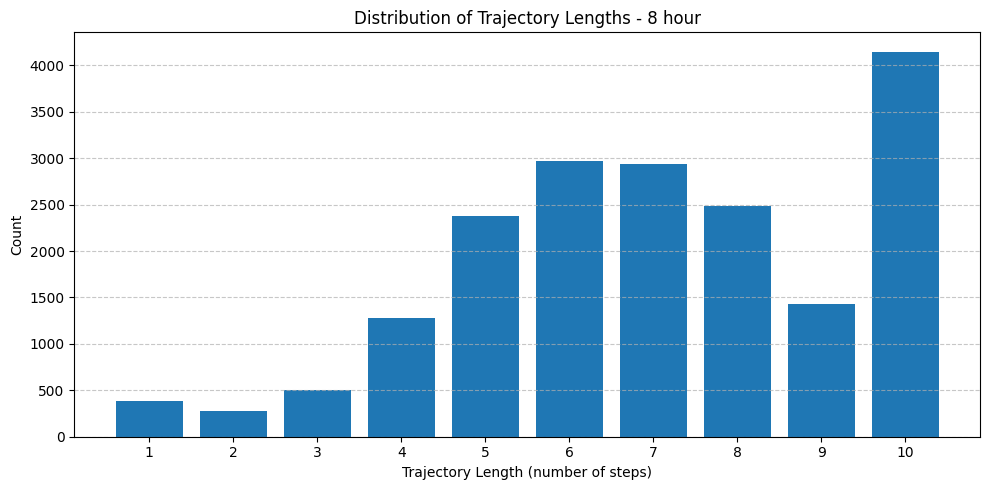

In [ ]:
lengths = full_zs.groupby('traj')['step'].count()
length_counts = lengths.value_counts().sort_index()
print("Length of each trajectorys")
print(length_counts.to_string())

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(length_counts.index, length_counts.values)
plt.xlabel("Trajectory Length (number of steps)")
plt.xticks(ticks=length_counts.index)
plt.ylabel("Count")
plt.title(f"Distribution of Trajectory Lengths - {timestep} hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig(f'traj_length_{timestep}h', dpi=300)
plt.show()



In [42]:
import numpy as np

max_len = lengths.max()
bins = list(range(0, int(np.ceil(max_len / 4)) * 4 + 1, 4))
labels = [f"{i+1}-{i+4}" for i in bins[:-1]]
grouped = pd.cut(lengths, bins=bins, right=True, include_lowest=True, labels=labels)
group_counts = grouped.value_counts().sort_index()

df = group_counts.reset_index()
df.columns = ['length_range', 'traj_count']       
df.insert(0, 'group_id', range(1, len(df) + 1))  

print(df.head(20).to_string(index=False))


 group_id length_range  traj_count
        1          1-4        2435
        2          5-8       10772
        3         9-12        5576


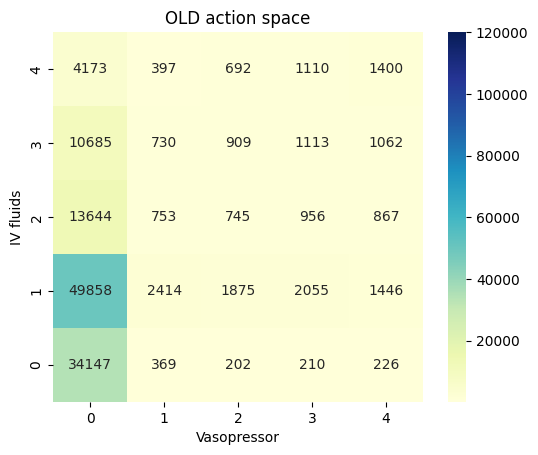

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.heatmap(full_zs['a:action'].value_counts().sort_index().values.reshape((5,5)), ax=ax, square=True, cmap="YlGnBu", vmax=1.2e5, annot=True, fmt='d')
ax.invert_yaxis()
plt.title('OLD action space')
plt.xlabel('Vasopressor')
plt.ylabel('IV fluids')
plt.show()

In [44]:
mean_length = lengths.mean()
print(f"Mean length of step: {mean_length:.2f}")

Mean length of step: 7.03
